# pandas

see: https://pandas.pydata.org/pandas-docs/stable/

In [1]:
import pandas as pd

## Read

In [2]:
data = pd.read_csv('test_linear_data.txt',delimiter=" ")
data

,x,y,dx,dy
0,0,1,0.1,0.2
1,1,2,0.2,0.1
2,2,3,0.3,0.1
3,3,5,0.1,0.4
4,4,5,0.1,0.1
5,5,6,0.1,0.2


In [3]:
data['z'] = data['x']*data['y']
data

,x,y,dx,dy,z
0,0,1,0.1,0.2,0
1,1,2,0.2,0.1,2
2,2,3,0.3,0.1,6
3,3,5,0.1,0.4,15
4,4,5,0.1,0.1,20
5,5,6,0.1,0.2,30


In [4]:
data.describe()

,x,y,dx,dy,z
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2.500000,3.666667,0.150000,0.183333,12.166667
std,1.870829,1.966384,0.083666,0.116905,11.634718
min,0.000000,1.000000,0.100000,0.100000,0.000000
25%,1.250000,2.250000,0.100000,0.100000,3.000000
50%,2.500000,4.000000,0.100000,0.150000,10.500000
75%,3.750000,5.000000,0.175000,0.200000,18.750000
max,5.000000,6.000000,0.300000,0.400000,30.000000


<AxesSubplot:xlabel='x'>

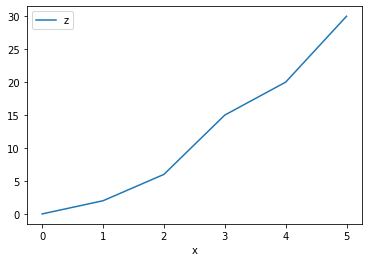

In [5]:
data.plot(x='x',y='z')

## To Latex

In [6]:
df = pd.DataFrame({'name': ['Raphael', 'Donatello'],

                   'mask': ['red', 'purple'],

                   'weapon': ['sai', 'bo staff']})
print(df.to_latex())

\begin{tabular}{llll}
\toprule
{} &       name &    mask &    weapon \\
\midrule
0 &    Raphael &     red &       sai \\
1 &  Donatello &  purple &  bo staff \\
\bottomrule
\end{tabular}



Needs \usepackage{booktabs}

## pandas + uncertainties

In [7]:
import uncertainties.unumpy as unp

In [8]:
rdata = pd.read_csv('test_linear_data.txt',delimiter=" ")
data = pd.DataFrame()
data['x'] = unp.uarray(rdata['x'],rdata['dx'])
data['y'] = unp.uarray(rdata['y'],rdata['dy'])
data['z'] = data['x']*data['y']
data

,x,y,z
0,0.00+/-0.10,1.00+/-0.20,0.00+/-0.10
1,1.00+/-0.20,2.00+/-0.10,2.0+/-0.4
2,2.00+/-0.30,3.00+/-0.10,6.0+/-0.9
3,3.00+/-0.10,5.0+/-0.4,15.0+/-1.3
4,4.00+/-0.10,5.00+/-0.10,20.0+/-0.6
5,5.00+/-0.10,6.00+/-0.20,30.0+/-1.2


In [9]:
data.describe()

,x,y,z
count,6,6,6
unique,6,6,6
top,0.00+/-0.10,1.00+/-0.20,0.00+/-0.10
freq,1,1,1


Error once with variance and once without:
$nerr=\sqrt{\text{var}^2+\text{err}^2}$

In [10]:
from smpl import stat
print(stat.novar_mean(data['x']))
print(stat.mean(data['x']))

2.50+/-0.07
2.5+/-1.9


In [11]:
print(data.to_latex())

\begin{tabular}{llll}
\toprule
{} &            x &            y &            z \\
\midrule
0 &  0.00+/-0.10 &  1.00+/-0.20 &  0.00+/-0.10 \\
1 &  1.00+/-0.20 &  2.00+/-0.10 &    2.0+/-0.4 \\
2 &  2.00+/-0.30 &  3.00+/-0.10 &    6.0+/-0.9 \\
3 &  3.00+/-0.10 &    5.0+/-0.4 &   15.0+/-1.3 \\
4 &  4.00+/-0.10 &  5.00+/-0.10 &   20.0+/-0.6 \\
5 &  5.00+/-0.10 &  6.00+/-0.20 &   30.0+/-1.2 \\
\bottomrule
\end{tabular}



## pandas + plot

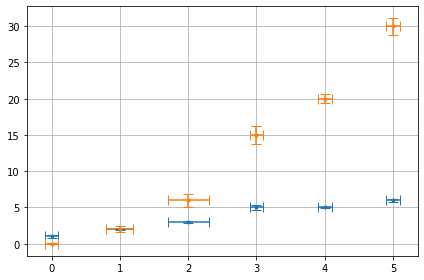

In [12]:
from smpl import plot
plot.data(data['x'],data['y'])
plot.data(data['x'],data['z'])